# Tarea 5. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 10.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


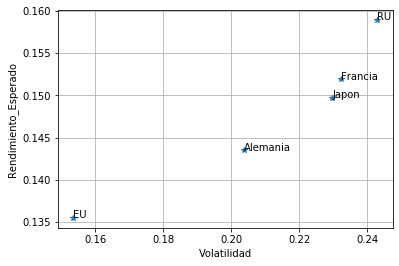

In [3]:
x_points =  annual_ret_summ.loc['Volatilidad']
y_points = annual_ret_summ.loc['Media']
# Ventana para graficar
plt.figure()
# Graficar puntos
plt.plot(x_points, y_points, '*')
# Etiquetas de los ejes
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento_Esperado')
# Etiqueta de cada instrumento
plt.text(annual_ret_summ.loc['Volatilidad','EU'],
         annual_ret_summ.loc['Media','EU'], 'EU')
plt.text(annual_ret_summ.loc['Volatilidad','RU'],
         annual_ret_summ.loc['Media','RU'], 'RU')
plt.text(annual_ret_summ.loc['Volatilidad','Francia'],
         annual_ret_summ.loc['Media','Francia'], 'Francia')
plt.text(annual_ret_summ.loc['Volatilidad','Alemania'],
         annual_ret_summ.loc['Media','Alemania'], 'Alemania')
plt.text(annual_ret_summ.loc['Volatilidad','Japon'],
         annual_ret_summ.loc['Media','Japon'], 'Japon')
plt.grid()

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [4]:
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


In [5]:
# Vector de w variando entre 0 y 1 con n pasos
N = 101
w = np.linspace(0,1,N)
# Rendimientos esperados individuales
# Activo1: EU, Activo2: Japon
E1 = annual_ret_summ.loc['Media','Japon']
E2 = annual_ret_summ.loc['Media','RU']
# Volatilidades individuales
s1 = annual_ret_summ.loc['Volatilidad','Japon']
s2 = annual_ret_summ.loc['Volatilidad','RU']
# Correlación
r12 = corr.loc['Japon','RU']
E1,E2,s1,s2,r12

(0.1497, 0.1589, 0.2298, 0.243, 0.3581)

In [6]:
portafolio = pd.DataFrame(data={'w':w,'Media':w*E1+(1-w)*E2,'Volatilidad':((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s1*s2*r12)**0.5})
portafolio

,w,Media,Volatilidad
0,0.00,0.158900,0.243000
1,0.01,0.158808,0.241402
2,0.02,0.158716,0.239824
3,0.03,0.158624,0.238266
4,0.04,0.158532,0.236727
...,...,...,...
96,0.96,0.150068,0.224272
97,0.97,0.149976,0.225619
98,0.98,0.149884,0.226990
99,0.99,0.149792,0.228383


In [7]:
def varianza(w,s1,s2,r12):
    return (w*s1)**2 + ((1-w)*s2)**2 +2*w*(1-w)*s1*s2*r12

In [8]:
w0=0.5
bnd = ((0,1),)

In [9]:
minvar = opt.minimize(fun=varianza,x0=w0,args=(s1,s2,r12),bounds=bnd)
minvar

      fun: array([0.03782716])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.08166817e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.54342238])

In [10]:
w1= minvar['x']
w2=1-w1
E_minvar = w1*E1 + (w2)*E2
s_minvar = varianza (w1,s1,s2,r12)**0.5
#s_minvar = minvar.fun**0.5
E_minvar,s_minvar

(array([0.15390051]), array([0.19449207]))

**Respuesta:**
El portafolio de **mínima varianza** tiene un peso de 54.34% para Japón y 45.66% para Reino Unido.

El **rendimiento esperado** del portafolio es de 15.39% y su volatilidad es de 19.45%.

## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [11]:
R12=0.5

In [12]:
portafolio2 = pd.DataFrame(data={'w':w,'Media':w*E1+(1-w)*E2,'Volatilidad':((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s1*s2*R12)**0.5})
portafolio2

,w,Media,Volatilidad
0,0.00,0.158900,0.243000
1,0.01,0.158808,0.241727
2,0.02,0.158716,0.240471
3,0.03,0.158624,0.239232
4,0.04,0.158532,0.238009
...,...,...,...
96,0.96,0.150068,0.225625
97,0.97,0.149976,0.226639
98,0.98,0.149884,0.227673
99,0.99,0.149792,0.228727


In [13]:
minvar2 = opt.minimize(fun=varianza,x0=w0,args=(s1,s2,R12),bounds=bnd)
minvar2

      fun: array([0.04175078])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.38777878e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.55570731])

In [14]:
W1= minvar2['x']
W2=1-W1
E_minvar2 = W1*E1 + (W2)*E2
s_minvar2 = varianza (W1,s1,s2,R12)**0.5
E_minvar2,s_minvar2

(array([0.15378749]), array([0.20433007]))

**Respuesta:**
El portafolio de **mínima varianza** tiene un peso de 55.57% para Japón y 44.43% para Reino Unido.

El **rendimiento esperado** del portafolio es de 15.38% y su volatilidad es de 20.43%.

## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

Text(0, 0.5, 'Rendimiento esperado ($E[r]$)')

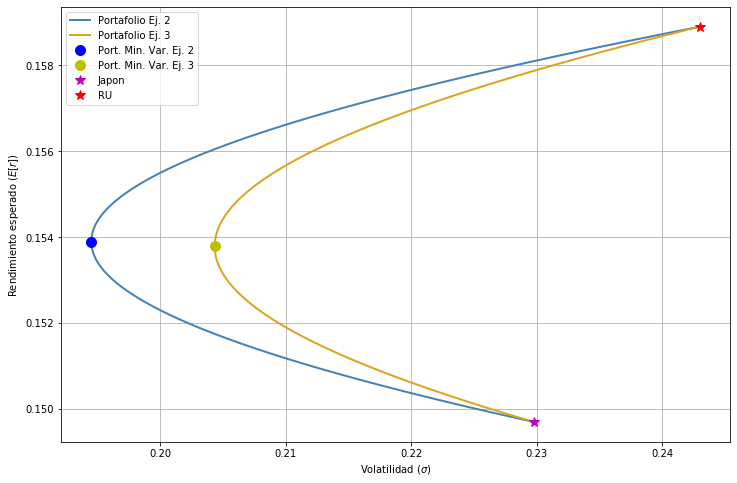

In [15]:
plt.figure(figsize=(12,8))
plt.plot(portafolio['Volatilidad'], portafolio['Media'], 'steelblue',lw=2, label='Portafolio Ej. 2')
plt.plot(portafolio2['Volatilidad'], portafolio2['Media'], 'goldenrod',lw=2, label='Portafolio Ej. 3')
plt.plot(s_minvar, E_minvar, 'ob', ms=10, label='Port. Min. Var. Ej. 2')
plt.plot(s_minvar2, E_minvar2, 'oy', ms=10, label='Port. Min. Var. Ej. 3')
plt.plot(s1,E1,'m*',ms=10,label='Japon')
plt.plot(s2,E2,'r*',ms=10,label='RU')
plt.grid()
plt.legend()
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')

### Conclusión
Se puede observar que el **portafolio del ejercicio 2** está más diversificado ya que hay **mayores** rendimientos para el mismo riesgo que el del otro portafolio. 
Los dos portafolios de **mínima varianza**,  aunque ambos tienen un rendimiento esperado similar (aproximadamente 15%) el portafolio graficado en azul tiene un **menor** riesgo. 
Esta diferencia se obtiene porque la correlación es **menor** y entra la regla de en cuanto **menos** correlacionados están los activos, más se puede diversificar el portafolio.